# Project Objective

    The goal of this project is to build a machine learning model that predicts whether a passenger survived the Titanic shipwreck, based on features like age, sex, class, fare, and more.

    The project includes:

        - Data cleaning and preprocessing

        - Exploratory Data Analysis (EDA)

        - Feature engineering

        - Model training and evaluation

        - Making predictions on the test dataset

In [1]:
# import necessary libraries
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


## Load and Explore the Data

In [2]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA):
Exploratory Data Analysis (EDA) is the process of analyzing and investigating datasets to summarize their main characteristics—often using visual methods.

In the Titanic Survival Prediction project, we use EDA to:

    - Understand the data distribution

    - Detect missing values

    - Explore relationships between features (like gender, age, class) and the target variable (Survived)

    - Identify outliers and patterns

    - Guide preprocessing and feature engineering steps

In [3]:
# Display shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Display column names and data types
print("\n Column Data Type")
print(df.dtypes)

# Check for missing values
print("\n Missing Values in each column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of Duplicates Rows: {df.duplicated().sum()} ")

Dataset Shape: (891, 12)

 Column Data Type
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 Missing Values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of Duplicates Rows: 0 


### Explanation:
- df.duplicated() → returns a Boolean Series where True indicates a duplicate row.
- .sum() → counts how many True values there are (i.e., how many duplicated rows exist).
- f"" → formats the print string with the result.
- object means non-numeric data like text or categories.

**we've now:**
      - Checked the dataset size and structure.891 rows & 12 columns
      - Identified numeric vs categorical features.
      - Found missing values (Age, Embarked, and likely Cabin) to fix. age has 177 missing value need to imputation, cabin often has many missing values — maybe drop or fill with 'Unknown'(not shown, but likely high).
      - Confirmed no duplicate entries.

## Analyze the Target Column (Survived)
### What is Survived?
This is the target variable (label) in the Titanic dataset:
    0 = Passenger did not survive
    1 = Passenger survived
Let’s visualize the survival distribution.

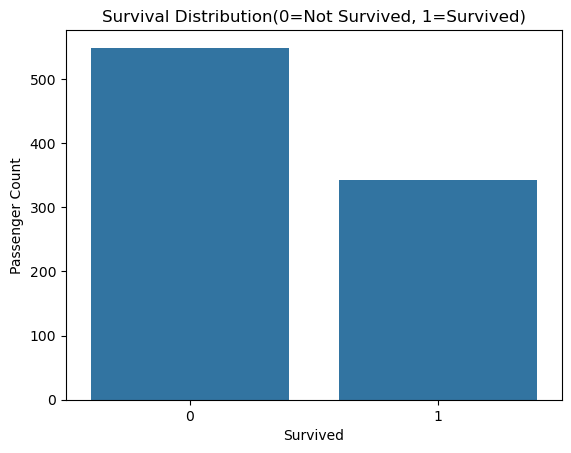


Survival Value Count
Survived
0    549
1    342
Name: count, dtype: int64


In [4]:
# Countplot of survival
sns.countplot(data=df, x='Survived')
plt.title("Survival Distribution(0=Not Survived, 1=Survived)")
plt.xlabel("Survived")
plt.ylabel("Passenger Count")
plt.show()

# Display exact counts
print("\nSurvival Value Count")
print(df['Survived'].value_counts())

### Explanation:
- There is (0=549) means 549 passenger is not survived.
- 342 passenger is survived(1=342).

## Handling Missing Values
### Why Handle Missing Values?
Missing data can bias results or prevent your model from training properly. It's crucial to either:
   - Fill (impute) missing values with appropriate statistics (mean, median, mode), or
   - Drop them if they are too few and not essential.

In [5]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

# Verify again
print("\nMissin Value After Handling")
print(df.isnull().sum())


Missin Value After Handling
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Explanation:
#### Why We Chose These Methods:
   - Median for Age: Median is better than mean when outliers or skewed distributions are present.
   - Mode for Embarked: Since only 2 values were missing, the most frequent port of embarkation was used to fill them.
   - Drop Cabin: Too many missing values (most entries are null), so it was more practical to remove it entirely.

## Encoding Categorical Variables:
This is a basic preprocessing step, required so that models can interpret categorical data.

   - Purpose: Convert non-numeric (text) columns into numeric form

In [6]:
# Encode 'Sex' & 'Embarked' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Check if there are any unexpected values that turned into NaN
print("Check if any Unexpected Values:")
print(df['Sex'].unique())

df['Sex'].fillna(-1, inplace=True)  # Handle any unexpected NaN values after mapping


# One-hot encode 'Embarked' column (drop first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Preview updated DataFrame
print(df.head())
print("\n \n Basic info: ")
print(df.info())


Check if any Unexpected Values:
[0 1]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       Fal

## Feature Engineering
To transform and create meaningful features that can enhance model performance and extract deeper patterns from the dataset.

In [7]:
# Drop Unnecessary Columns: Removed columns like PassengerId, Name, Ticket, and Cabin as they do not contribute significant predictive power.
df.drop(['PassengerId', 'Name', 'Ticket',], axis=1, inplace=True)

# Feature Creation: FamilySize = SibSp + Parch (indicates traveling group size),IsAlone = 1 if FamilySize == 0, else 0
df['FamilySize']= df['SibSp'] + df['Parch']
df['IsAlone']= (df['FamilySize'] == 0).astype(int)

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0       3    0  22.0      1      0   7.2500       False        True   
1         1       1    1  38.0      1      0  71.2833       False       False   
2         1       3    1  26.0      0      0   7.9250       False        True   
3         1       1    1  35.0      1      0  53.1000       False        True   
4         0       3    0  35.0      0      0   8.0500       False        True   

   FamilySize  IsAlone  
0           1        0  
1           1        0  
2           0        1  
3           1        0  
4           0        1  


## Feature Scaling & Train-Test Split
#### Why we do this:
   - Feature Scaling ensures that numeric features like Age, Fare, etc. are on the same scale — especially useful for distance-based algorithms (e.g., KNN, Logistic Regression).

   - Train-Test Split divides the data into training and testing sets so we can evaluate the model on unseen data.

In [8]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train and test sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [9]:
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, model_name="Model"):
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    preds = model.predict(X_val)

    # Evaluate
    accuracy = accuracy_score(y_val, preds)
    precision = precision_score(y_val, preds)
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)

    print(f"---- {model_name} Evaluation ----")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("\n")
    
    return model, preds


## Model Training & Evaluation:
**We'll start with Logistic Regression, a great baseline model for binary classification.**

**Why Logistic Regression?**
   - Simple and interpretable
   - Works well for binary classification problems like Titanic survival
   - Provides probabilities (good for ROC AUC analysis later)

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



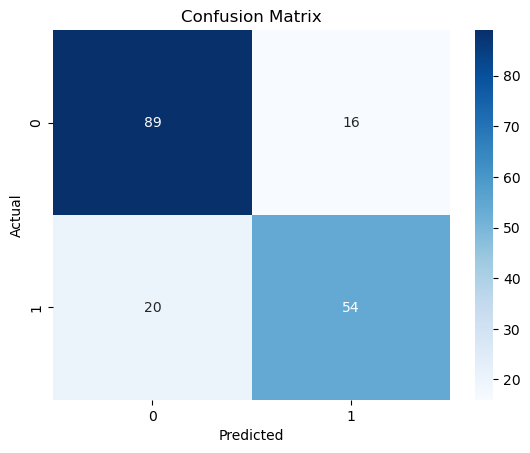

In [10]:
# Initialize and train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_val, y_pred), annot= True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




## Train Random Forest & XGBoost

In [11]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on validation set
rf_preds = rf_model.predict(X_val)
xgb_preds = xgb_model.predict(X_val)
log_preds = model.predict(X_val)  # Logistic Regression (already trained)

# Evaluate and compare
print("\nLogistic Regression Performance:")
print(classification_report(y_val, log_preds))
print("Accuracy:", accuracy_score(y_val, log_preds))

print("\nRandom Forest Performance:")
print(classification_report(y_val, rf_preds))
print("Accuracy:", accuracy_score(y_val, rf_preds))

print("\nXGBoost Performance:")
print(classification_report(y_val, xgb_preds))
print("Accuracy:", accuracy_score(y_val, xgb_preds))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       105
           1       0.88      0.09      0.17        74

    accuracy                           0.62       179
   macro avg       0.74      0.54      0.46       179
weighted avg       0.72      0.62      0.51       179

Accuracy: 0.6201117318435754

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8324022346368715

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0

In [12]:
# Store F1 scores
model_scores = {
    'Logistic Regression': f1_score(y_val, log_preds),
    'Random Forest': f1_score(y_val, rf_preds),
    'XGBoost': f1_score(y_val, xgb_preds)
}

# Find the best one based on F1
best_model = max(model_scores, key=model_scores.get)

print("\nBest Model Based on F1 Score:")
print(f"{best_model} with F1 Score: {model_scores[best_model]:.4f}")


Best Model Based on F1 Score:
Random Forest with F1 Score: 0.7917


## 1. Load and Preprocess the Test Set

In [13]:
# Load test data
test_data = pd.read_csv("test.csv")

# Fill missing Age and Fare with medians from training set
test_data['Age'].fillna(df['Age'].median(), inplace=True)
test_data['Fare'].fillna(df['Fare'].median(), inplace=True)

# Fill missing Embarked with most frequent ('S')
test_data['Embarked'].fillna('S', inplace=True)

# Encode 'Sex'
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'].fillna(-1, inplace=True)

# Encode 'Embarked'
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# One-hot encode 'Embarked' column (drop first)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Add missing dummy columns if they’re not present
for col in ['Embarked_Q', 'Embarked_S']:
    if col not in test_data.columns:
        test_data[col] = 0

# Create additional features
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['IsAlone'] = (test_data['FamilySize'] == 0).astype(int)

# Save PassengerId for submission
test_ids = test_data['PassengerId']

# Drop unnecessary columns
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Ensure test_data columns are in the same order as training data (excluding Survived)
test_data = test_data[df.drop('Survived', axis=1).columns]


## 2. Predict & Save Submission

In [14]:
# Predict with trained Random Forest model
test_preds = rf_model.predict(test_data)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': test_preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file created: submission.csv")
submission.head()

Submission file created: submission.csv


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


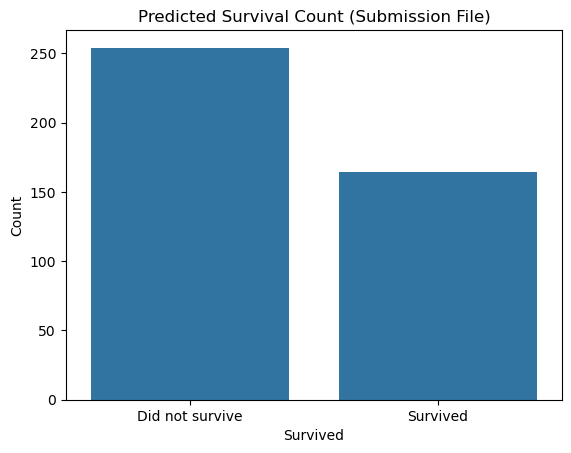

In [15]:
# Load the submission file
submission = pd.read_csv('submission.csv')

# Plot predicted survival count
sns.countplot(x='Survived', data=submission)
plt.title('Predicted Survival Count (Submission File)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()

## Hyperparameter Tuning – Random Forest
**We'll tune these key hyperparameters:**
   - n_estimators: Number of trees in the forest
   - max_depth: Maximum depth of the trees
   - min_samples_split: Minimum samples required to split an internal node
   - min_samples_leaf: Minimum samples required at each leaf node

In [16]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate best model
val_preds = best_rf.predict(X_val)
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, val_preds))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



## Save the Best Model

In [17]:
import pickle

# Save the RandomForest model
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(best_rf, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

    
print("Model and scaler saved successfully.")


Model and scaler saved successfully.


## Visualizations from submission.csv

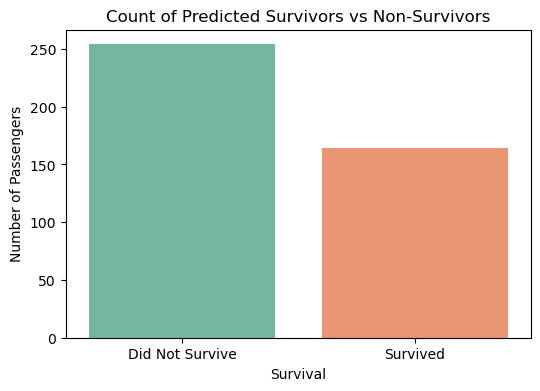

In [18]:
# 1. Count of Predicted Survivors vs Non-Survivors
plt.figure(figsize=(6,4))
sns.countplot(data=submission, x='Survived', palette='Set2')
plt.title('Count of Predicted Survivors vs Non-Survivors')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.xlabel('Survival')
plt.show()

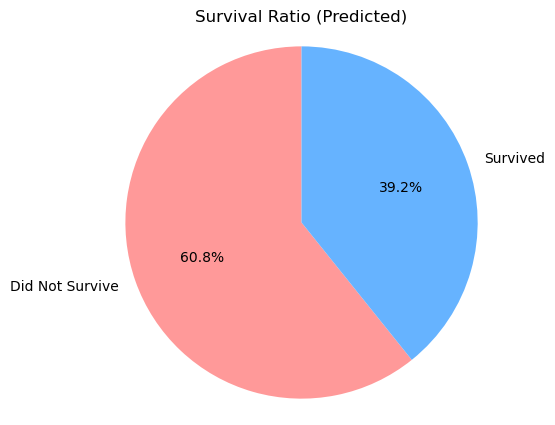

In [19]:
# 2. Pie Chart of Survival Ratio
survival_counts = submission['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5,5))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Survival Ratio (Predicted)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


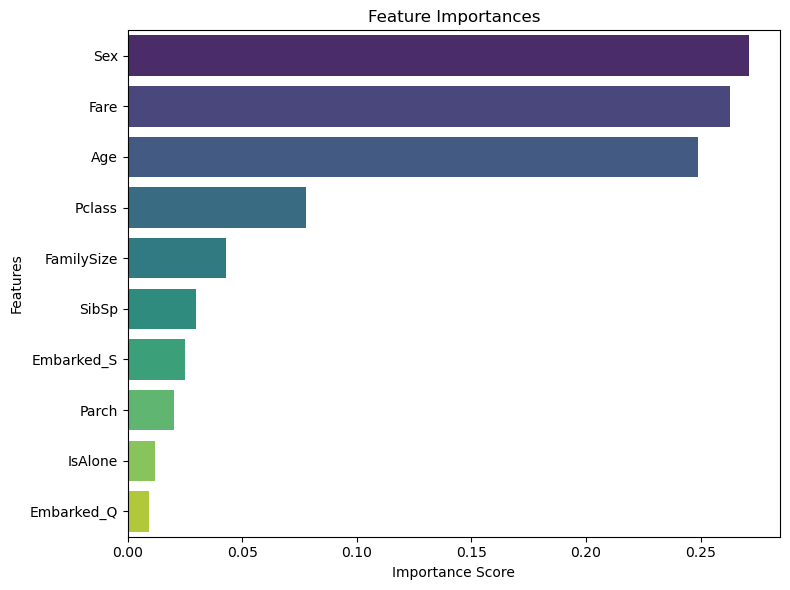

In [20]:
# 3. Bar Plot of Feature Importances 
importances = rf_model.feature_importances_
features = X_train.columns  # Make sure this matches your actual training feature set

# Create a DataFrame for easier plotting
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# Load the model

In [21]:
# Load saved model and preprocessors
model = pickle.load(open("random_forest_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))